# Task

You are given a list containing 62 list (`data`) of EKG-Time Series (Voltages in mV). Each of the subseries has 5000 elements (is 5000 ms long). The time series overlap. Your task is to reassemble the time series into one consecutive list of 60 seconds again and store it in a file with a temporal resolution of 10 ms.

In [1]:
# %% Load the data
 
from load_files import load_data
data = load_data()

In [2]:
# Number of Lists in the List
len(data)

62

In [3]:
# Example of a list / part of the time series containing the numbers as strings
data[0][0:5]

['309', '307', '306', '304', '303']

## Grading
- 10 pt: one per passing the unit test of each function
- 4 pt: storing the final sequence in a file `downsample.txt`
- 4 pt: resampling it down to 100 Hz and describe why You did the resampling the way you did it in a `README.txt` file
- 2 pt: reasonable comments
- 2 pt: naming conventions
- 2 pt: docstrings
- 4 bonus pt: fast and efficient algorithm

### Requirements
- `.zip` file in Sakai
- data of submission: 30.06.2023
- one file per group: `A1_Nachname1_Nachname2.zip`

### Requirements
- `.zip` file in Sakai
- data of submission: 30.06.2023
- one file per group: `A1_Nachname1_Nachname2.zip`

Starting points
The challenge is split into various subproblems. Each subproblem can be solved with a function. If you implement all functions, You can pass the assignment even if You would fail to complete the sequence assembly.

The outline of the functions is given below. You can also find a unit test for each function below.

First, implement end test the following four functions. Run the unit test below, to make sure they work.


## Decision on further parameters
Next, we set some further parameters, so that we all work on the same basis.

Frist, we assume, that the want a `minimal_overlap` of least 10 values to be identical before we match the data. If this number would become to short, we would falsely connect parts of the data that do not belong together.

If 
`minimal_overlap` was `3`, both

- `ABCDEF` and
- `ABCXYZ`

could be following to

- `123ABC`
e.g.,

- `123ABCDEF`
- `123ABCXYZ`

This could lead to picking the wrong fragment and lead the algorithm to stop in a dead-end.

As our simple algorithm cannot differentiate what is right. We choose a large `minimal_overlap` as save-guard.

We also make a copy `list_of_fragments_to_work_with` of out original data, so we do not mess with it and choose an arbitraty sequence `longest_fragment` to start the synthesis. We will use `longest_fragment` later to add the matching sequences we found.

In [4]:
# Minimal sequence lenth for valid matches
minimal_overlap = 10

# Copy the list of fragments
list_of_fragments_to_work_with = data[:]

# start with a random fragment
longest_fragment  = list_of_fragments_to_work_with[10]

print("Selected one of the fragments as the initial segment. Now there are {} remaining.".format(len(list_of_fragments_to_work_with)))


Selected one of the fragments as the initial segment. Now there are 62 remaining.


## Individual Functions
The challenge is divided into various subproblems. Each subproblem can be solved with a function. If you implement all functions, You can pass the assignment even if You would fail to complete the sequence assembly.

The outline of the functions is given below. You can also find a unit test for each function below.

First, implement end test the following four functions. Run the unit test below, to make sure they work.

In [5]:
def compare_beginning(long_list, shot_list, least_overlap):

  """Compares the beginning of the long_list to see if there is a overlap to the short_list. 
  Returns the number of items that overlap. With the least overlap parameter, 
  You can tweak what the minimal overlap between the strings must have. 
  If the overlap is smaller than the least required overlap, return 0."""
  # ...
  
  return overlap

In [6]:
def compare_end(long_list, shot_list,least_overlap):

  """Compares the end of the long_list to see if there is a overlap to the short_list. 
  Returns the number of elements that overlap. If the overlap is smaller than the least required overlap, return 0"""
  # ...
  
  return overlap

In [7]:
def glue_fragments_end(long_list, short_list, size_of_overlap):
  """Returns a list that glues the last part of the short_list to the beginning of the long_list."""
  # ...
  
  return new_string

In [8]:
def glue_fragments_beginning(long_list, short_list, size_of_overlap):
  """Returns a list that glues the first part of the short_list to the end of the long_list."""
  # ...
  
  return new_string

## Unit Test
The following unit test, automatically test Your functions with small examples as an input.

For instance, the `test_compare_beginning_find()` is testet by finding the number overlapping letters at the beginning of `["Q","W","E","R","T","Z","U","I","O","P","A","S","D","F"]` and `["A","Q","W","E","R","T"]`. The test also passes the parameter `least_overlap=3`, so that only overlaps with at least three letters are counted.

If You run the following cell after You defined the function `test_compare_beginning_find()` the following lines should be a result of the cell.

```
test_compare_beginning_find (__main__.CompareBeginningsTestCase)
Do we find an overlap that is at least 3 at the beginning of the String? ... ok
```
The ok indicates, that Your code worked es expected.

In [3]:
import unittest

class CompareBeginningsTestCase(unittest.TestCase):
  """Tests for the challenge"""

  def test_compare_beginning_find(self):
    """Do we find an overlap that is at least 3 at the beginning of the String?"""
    overlap = compare_beginning(["Q","W","E","R","T","Z","U","I","O","P","A","S","D","F"], ["A","Q","W","E","R","T"],3)
    self.assertEqual(overlap, 5)
  
  def test_compare_beginning_find_but_useless(self):
    """Do we find if the matching search string we find contributes no additional information because of equal length?"""
    overlap = compare_beginning(["Q","W","E","R","T","Z","U","I","O","P","A","S","D","F"], ["Q","W","E","R","T","Z"],3)
    self.assertEqual(overlap, 0)

  def test_compare_beginning_find_but_useless2(self):
    """Do we find if the matching search string we find contributes no additional information because it is to short?"""
    overlap = compare_beginning(["Q","W","E","R","T","Z","U","I","O","P","A","S","D","F"], ["W","E","R","T","Z"],3)
    self.assertEqual(overlap, 0)

  def test_compare_beginning_no_find(self):
    """Do we return 0 if we do not find a match?"""
    overlap = compare_beginning(["Q","W","E","R","T","Z","U","I","O","P","A","S","D","F"], ["A","A","A","A","A"],5)
    self.assertEqual(overlap, 0)

class CompareEndingsTestCase(unittest.TestCase):
  """Tests for the challenge"""

  def test_compare_ending_find(self):
    """Do we find an overlap that is at least 3 at the beginning of the String?"""
    overlap = compare_end(["Q","W","E","R","T","Z","U","I","O","P","A","S","D","F"], ["P","A","S","D","F","1","22","3","4","5"],3)
    self.assertEqual(overlap, 5)
  
  def test_compare_ending_find_but_useless(self):
    """Do we find if the matching search string we find contributes no additional information because of equal length?"""
    overlap = compare_end(["Q","W","E","R","T","Z","U","I","O","P","A","S","D","F"], ["P","A","S","D","F"],4)
    self.assertEqual(overlap, 0)

  def test_compare_ending_find_but_useless2(self):
    """Do we find if the matching search string we find contributes no additional information because it is to short?"""
    overlap = compare_end(["Q","W","E","R","T","Z","U","I","O","P","A","S","D","F"],["P","A","S","D"],3)
    self.assertEqual(overlap, 0)

  def test_compare_ending_no_find(self):
    """Do we return 0 if we do not find a match?"""
    overlap = compare_end(["Q","W","E","R","T","Z","U","I","O","P","A","S","D","F"], ["P","A","S","D","F","1","2","3","4","5"],6)
    self.assertEqual(overlap, 0)


class GlueFragmentsTestCase(unittest.TestCase):
  """Tests for the challenge"""

  def test_glue_to_beginning(self):
    """Do we get the right new string in return?"""

    string = ["A","B","C","D","E","G","F"]
    substring = ["0","1","2","3","A","B","C"]
    size_of_overlap = 3

    new_sting = glue_fragments_beginning(string, substring, size_of_overlap)
    new_sting = self.assertEqual(new_sting, ["0","1","2","3","A","B","C","D","E","G","F"])


  def test_glue_to_end(self):
    """Do we get the right new string in return?"""

    string = ["Q","W","E","R","T","Z","U","I","O","P","A","S","D","F"]
    substring = ["P","A","S","D","F","1","2","3","4","5","6","7","8"]
    size_of_overlap = 5

    new_sting = glue_fragments_end(string, substring, size_of_overlap)
    self.assertEqual(new_sting, ["Q","W","E","R","T","Z","U","I","O","P","A","S","D","F","1","2","3","4","5","6","7","8"])

unittest.main(argv=[''], verbosity=2, exit=False)

test_compare_beginning_find (__main__.CompareBeginningsTestCase)
Do we find an overlap that is at least 3 at the beginning of the String? ... ok
test_compare_beginning_find_but_useless (__main__.CompareBeginningsTestCase)
Do we find if the matching search string we find contributes no additional information because of equal length? ... ok
test_compare_beginning_find_but_useless2 (__main__.CompareBeginningsTestCase)
Do we find if the matching search string we find contributes no additional information because it is to short? ... ok
test_compare_beginning_no_find (__main__.CompareBeginningsTestCase)
Do we return 0 if we do not find a match? ... ok
test_compare_ending_find (__main__.CompareEndingsTestCase)
Do we find an overlap that is at least 3 at the beginning of the String? ... ok
test_compare_ending_find_but_useless (__main__.CompareEndingsTestCase)
Do we find if the matching search string we find contributes no additional information because of equal length? ... ok
test_compare_endi

## Executing the Code

The following two cells use your functions to reassemble the time series. Depending on how clever You implemented Your functions this can take even some minutes.

In [10]:
# go through all remaining fragements and find matching patterns
def assemble_sequence(longest_fragment, list_of_fragments_to_work_with):

  length_of_reconstructed_sequence = len(longest_fragment)

  while length_of_reconstructed_sequence < 59999 :
    
    for current_fragement in list_of_fragments_to_work_with:
      #print(current_fragement)
    # compare beginnings
      found_overlap = compare_beginning(longest_fragment, current_fragement,minimal_overlap)
      if found_overlap > 0:
        
        #longest_fragment =  current_fragement[0:len(current_fragement)-found_overlap] + longest_fragment
        longest_fragment = glue_fragments_beginning(longest_fragment, current_fragement, found_overlap)
        list_of_fragments_to_work_with.remove(current_fragement)

    # compare endings
      found_overlap = compare_end(longest_fragment, current_fragement,minimal_overlap)
      if found_overlap > 0:
        longest_fragment = glue_fragments_end(longest_fragment, current_fragement, found_overlap)
        #longest_fragment = longest_fragment + current_fragement[-found_overlap:]
        list_of_fragments_to_work_with.remove(current_fragement)

    # if math, find the position and add in to the longest fragement remove the fragment from the list
    length_of_reconstructed_sequence = len(longest_fragment)
    print("The final sequence has gown to {} elements!".format(len(longest_fragment)))

  return longest_fragment

In [11]:
import time

# get the start time
st = time.time()

result = assemble_sequence(longest_fragment, list_of_fragments_to_work_with[:])
len(result)

print("The final segment is {} ms long.".format(len(result)))


# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st

print('Execution time:', elapsed_time, 'seconds')

The final sequence has gown to 17432 elements!
The final sequence has gown to 27507 elements!
The final sequence has gown to 39197 elements!
The final sequence has gown to 46241 elements!
The final sequence has gown to 60000 elements!
The final segment is 60000 ms long.
Execution time: 63.94821739196777 seconds


## Down-sampling and Storing

Down-sample the list in `result` to a resolution of 100 Hz and store it in a text file. You have to transform the strings in the list to numerics first.

# ENTFERNEN - MUSTERLÖSUNG

In [9]:

def compare_beginning(string, substring, least_overlap):

  """Compares the beginning of the string to see if there is a overlap to the substring. Returns the number of nukleotides that overlap. With the least overlap parameter, You can tweak what the minimal overlap betrween the strings must be."""
  overlap = 0

  # compare the beginning of the string to the substring

  if string[0:len(substring)] == substring:
    its_a_match = True
      # this is useless as we cannot add anything to the beginning
    #print("Have the same length and are indentical.")
  else:
    for length_to_compare in range(len(substring),least_overlap,-1):
        #print(length_to_compare)
        
      last_of_substring = substring[-length_to_compare:]
      first_of_string = string[0:length_to_compare]

      #print("Comparing {} nukleotides: {} - {}".format(length_to_compare,first_of_string,last_of_substring))


      if first_of_string == last_of_substring:
        its_a_match = True
        #print("The first {} nukleotides of the string are identical to the last of the substring!".format(length_to_compare))
        overlap = length_to_compare
        break
  return overlap

def compare_end(string, substring,least_overlap):

  """Compares the end of the string to see if there is a overlap to the substring. Returns the number of nukleotides that overlap."""

  overlap = 0

  # compare the beginning of the string to the substring

  if string[-len(substring):] == substring:
    its_a_match = True
      # this is useless as we cannot add anything to the beginning
    #print("Have the same length and are identical")
  else:
    for length_to_compare in range(len(substring),least_overlap,-1):
        
      first_of_substring = substring[0:length_to_compare]
      last_of_string = string[-length_to_compare:]


      #print("Comparing {} nukleotides: {} - {}".format(length_to_compare,first_of_substring,last_of_string))

      if first_of_substring == last_of_string:
        its_a_match = True
        #print("The last {} nukleotides of the string are identical to the first of the substring!".format(length_to_compare))
        overlap = length_to_compare
        break
  return(overlap)

def glue_fragments_end(string, substring, size_of_overlap):
  """Returns a String that glues the first part of the substring to the beginning of the string."""
  new_string = string + substring[size_of_overlap:]
  return new_string

def glue_fragments_beginning(string, substring, size_of_overlap):
  """Returns a String that glues the first part of the substring to the end of the string."""
  new_string =  substring[0:len(substring)-size_of_overlap] + string
  return new_string

In [19]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({"Voltage" : result})
df["Voltage"] = df["Voltage"].astype("float")
df["Voltage"].head(1000).plot()

<AxesSubplot:>

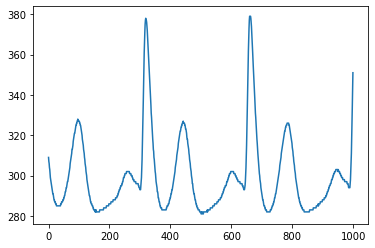